# Audio and signals

We'll finish this chapter off with a quick overview of acoustic signals: how waves propagate in an environment, and how we can reason about them as signals.

This introduction is superficial, and will mainly become relevant much later on when we go into convolutional filtering, but it may help to ground some of the principals in physical reality.
For a more thorough introduction to acoustics, readers should consult {cite}`everest_master_2015`.

In [1]:
%run ../setup.ipynb

## Sound propagation

Let's imagine a simple recording scenario.  There is some source emitting sound signal $x_s$, perhaps a musical instrument or a human voice, and a microphone is placed 5 meters away, recording the microphone signal $x_m$.
To keep things simple, let's imagine that there are no other sounds in the environment, and there are no surfaces that could cause reflections or resonances.

If the speed of sound is some $C$ ``[meters / second]``, then it will take $5 / C$ ``[seconds]`` for sound to travel from the source to the microphone.
Put another way, the pressure we measure at time $t$ is induced by the source signal at time $t - 5/C$.
More generally, if the distance is $D$ ``[meters]``, we have the following

```{margin} Negative time offset?
Many people find the negative time offset in {eq}`distance-delay` to be counter-intuitive, and it's a common mistake to instead write $t+D/C$.

It can help to reason about what $x_m(t)$ represents: it's recording a signal that must have already occurred.
If $x_m(t)$ depended on $x_s(t + D/C)$, then it must be recording from the future, which is impossible.
```

```{math}
:label: distance-delay
x_m(t) \approx x_s(t - D/C).
```

We've written $\approx$ here, and not $=$, because the signals will not be identical: the amplitude will also change.

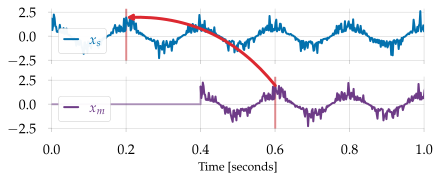

In [3]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figaspect(0.4))

rng = np.random.RandomState(seed=0)

t = np.linspace(0, 1, num=500)
x = np.cos(2 * np.pi * 5 * t) * np.sqrt(0.25 +  rng.randn(len(t))**2)

delta = 0.4
ax1.plot(t, x, label='$x_s$')
ax1.label_outer()
ax1.legend(loc='lower left', labelcolor='linecolor')
ax2.plot(t + delta, x, color=colors[4], label='$x_m$')
ax2.plot([0, delta, delta], [0, 0, x[0]], color=colors[4], alpha=0.5)
ax2.set(xlabel='Time [seconds]')
ax2.set(xlim=[t.min(), t.max()])
ax2.legend(loc='lower left', labelcolor='linecolor')

idx = 100
ax1.axvline(t[idx], zorder=-1, color=colors[1], alpha=0.5)
ax2.axvline(t[idx] + delta, zorder=-1, color=colors[1], alpha=0.5)

conn = ConnectionPatch((t[idx], x[idx]), (t[idx] + delta, x[idx]), 'data', axesA=ax1, axesB=ax2, linewidth=3, color=colors[1],
                           connectionstyle="arc3,rad=-0.25", arrowstyle="<-",)
fig.add_artist(conn)
glue('delay-ex', fig, display=False)

```{glue:figure} delay-ex
:alt: A signal before and after applying a delay, with an arrow indicating corresponding time points.

A signal $x_s$ emitted by a source (*top*) and observed by a microphone as $x_m$ (bottom).
If the signal takes time $0.4$ [seconds] to propagate from the source to microphone, then $x_m(t) = x_s(t-0.4)$.
```

(pressure-intensity)=
## Pressure, intensity, amplitude, and loudness

The first property of audio signals that we often think of is *loudness*.
This turns out to be a surprisingly subtle property: loudness is ultimately a psycho-acoustic phenomenon (something that happens in our brains), and not a physically measurable phenomenon.
There are, however, numerous physical quantities that we *can* and do measure that relate to loudness.
We'll briefly summarize the most important ones here, as described in the [ISO 80000-8:2020 standards](https://www.iso.org/standard/64978.html):

```{margin} Physical units

If you're a little out of practice with physical units, **don't worry about it**.
We include this information here for completeness, but it mostly won't matter too much when working with digital signals.

For reference though, a Pascal [Pa] is a unit of pressure: force spread over a surface area.
If you're from one of the few countries using "standard" units, think of "pounds per square-inch (PSI)" used to measure air pressure in tires: it's the same idea.
```

| Name | Description | Symbol | Units |
| :--- | :---           | ---:    | ---: |
| *Sound pressure* | the change in ambient (static) air pressure due to the sound | $p$ | Pascals $[\text{Pa}]$ |
| *Sound power* |  the rate at which sound energy is emitted by a source | $P$ | Watts $[\text{W}]$ |
| *Sound intensity* | sound power per unit area | $I$ |  Watts per square-meter $\left[\frac{\text{W}}{\text{m}^2}\right]$ |


Human ears and microphones respond to *sound pressure* ($p$), the latter converting pressure to an electrical signal measured in Volts $[\text{V}]$.

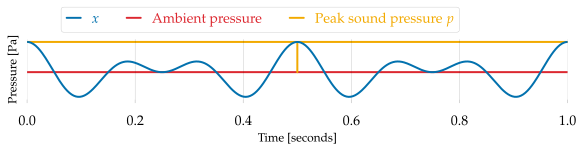

In [7]:
fig, ax = plt.subplots(figsize=figaspect(0.25))

rng = np.random.RandomState(seed=0)

t = np.linspace(0, 1, num=500)
x = np.cos(2 * np.pi * 5 * t) * np.cos(2 * np.pi  * t)

ax.plot(t, x, label='$x$')
ax.axhline(x.mean(), color=colors[1], zorder=-1, label='Ambient pressure')
ax.axhline(x.max(), color=colors[2], zorder=-1, label='Peak sound pressure $p$')
ax.plot([0.5, 0.5], [0, 1], color=colors[2], zorder=-1)
ax.legend(bbox_to_anchor=(0.05, 1), ncol=3, labelcolor='linecolor')
ax.set(yticks=[], ylabel='Pressure [Pa]', xlabel='Time [seconds]')
glue('pressure', fig, display=False)

```{glue:figure} pressure
:alt: A signal oscillating around the ambient pressure level, with the peak pressure level indicated.

An acoustic signal $\blue{x}$ causes air pressure to fluctuate around the ambient pressure.
The amplitude of the signal is given by the maximum difference from the ambient pressure.
```

Sound power ($P$) and intensity ($I$) are useful for quantifying the transmission of sound through an environment.
Intensity might seem a bit strange at first glance, as it divides a unit of power (Watts) by a unit of surface area (square-meters).
This can be understood by imagining an omni-directional sound source with some fixed power $P$.
As sound propagates from the source, its power is spread over the surface of a sphere.
When the sound has traveled $r$ meters from the source, the corresponding sphere has surface area 

```{math}
a = 4\pi \cdot r^2.
```

and the corresponding intensity $I$ is

```{math}
I = \frac{P}{a} = \frac{P}{4\pi \cdot r^2} \left[\frac{\text{W}}{\text{m}^2}\right]
```

Without going too far into the details of these quantities, they are defined such that intensity (and power) is proportional to the *square* of pressure:

````{margin} Proportionality
The proportionality symbol $\propto$ means that two quantities are multiplicatively related to each other, but the exact proportion is not too important (as long as it is constant).

For example, one could write that the circumference of any circle is proportional to its radius: 
```{math}
C = 2\pi \cdot r \propto r.
```
if we didn't care too much about the constant factor of $2\pi$.
However, we could *not* write $C \propto r^2$, because there is no constant that relates the square of the radius to the circumference.

While this notation does make dimensional analysis impossible, it can be helpful to isolate the key quantities of interest.
````

```{math}
I \propto p^2
```

Equivalently, this implies that sound pressure is inversely proportional to distance:

```{math}
p \propto \sqrt{I} = \sqrt{\frac{P}{4\pi \cdot r^2}} = \frac{1}{r} \cdot \sqrt{\frac{P}{4\pi}} \propto \frac{1}{r}
```

This tells us that if the power $P$ is held constant, and we move a microphone away from the source, the output voltage will decay like $1/r$.
In the context of this text, the voltage output of a microphone is not observed directly, but is instead post-processed and amplified before being digitized.
The resulting *amplitude* ($A$) of the signal is generally proportional to the microphone's output voltage, which is in turn proportional to pressure:

```{tip}
Signal amplitude $\propto$ Voltage $\propto$ Sound pressure
```

(decibels)=
### Decibels (dB)

Human hearing is sensitive to sound pressure, but this sensitivity is not *linear*.
A *doubling* of sound pressure **does not** result in the perception of being *twice as loud*.
As mentioned above, perception of loudness is a complex phenomenon, but to a first approximation, it is fair to say that humans are sensitive to *ratios* of pressure ($p_1 / p_2$), not *differences* ($p_1 - p_2$).
Logarithms allow us to convert ratios into differences:
````{margin}
```{tip}
If you're rusty on logarithms, you may want to pause here and read through the [appendix](logarithms).
```
````
```{math}
\log \frac{a}{b} = \log(a) - \log(b),
```
which are often more convenient to deal with.
This leads us to the **decibel (dB)** scale for ratios:

```{math}
\text{dB}(v_1, v_2) = 10 \cdot \log_{10} \left(\frac{v_1}{v_2}\right).
```

Since the logarithm function expects a dimension-less input, the values being compared must have the same units, which cancel when divided.

*Sound intensity level* is defined in terms of the decibels between sound intensity $I$ and a reference intensity $I_0$:

```{math}
L = 10 \cdot \log_{10} \left(\frac{I}{I_0}\right),
```
or in terms of pressure (with reference pressure $p_0$):
```{math}
10 \cdot \log_{10} \left(\frac{p^2}{p_0^2}\right) = 10 \cdot \log_{10} \left(\frac{p}{p_0}\right)^2 = 20 \cdot \log_{10} \left(\frac{p}{p_0}\right).
```

Although we usually think of decibels as measuring intensity (or some nebulous correlate of *loudness*), decibels in fact just measure *ratios*, and can be applied to all kinds of quantities.
When specifically applied to sound pressure measurements, we sometimes write $\text{dB}_\text{SPL}$

**Some facts about decibels**

- Decibels can be positive or negative. A ratio $<1$ corresponds to negative dB; a ratio $>1$ corresponds to positive dB.  A ratio of exactly 1 gives 0 dB.
- A decibel is one tenth of a Bel.  (But nobody really measures things in Bels.)
- An amplitude (or pressure) ratio of 2 (doubling) corresponds to $20 \log_{10} 2 \approx +6 \left[\text{dB}\right]$.
- A pressure ratio of 1/2 (halving) gives $-6 \left[\text{dB}\right]$.
- The standard reference pressure is $p_0 = 20$ micro-Pascals.
- [Wikipedia](https://en.wikipedia.org/wiki/Sound_pressure#Examples) gives a helpful list of familiar sound pressure levels in decibels.
    - Typical speaking volume is in the range 40-60 dB.
- The range of typical human hearing (quietest sound to loudest sound) is a complex phenomenon and depends on frequency, but is in the neighborhood of $100 \left[\text{dB}\right]$.

## Frequency and pitch

After intensity, the next most salient feature of audio signals is *frequency* content.
By definition, any periodic signal has a fundamental frequency $f_0$, but most signals are not completely periodic.
As we will see much later on, there is a way to reason about the frequency content of arbitrary signals.
For now, it will suffice to assume that any signal generally consists of a combination of multiple sinusoidal signals, each one having a distinct fundamental frequency $f_0$.

Like *loudness* and *amplitude*, it is helpful to distinguish between *pitch* and *frequency*.
**Pitch** is a perceptual feature of sound that exists in our brains, but **frequency** is a physical property of sound that can be measured.

````{margin}
```{note} Tuning systems
In this section, and throughout the text, we will make the simplifying assumption of equal temperament when discussing pitch.
```
````

### Multiplicative vs. additive

The most important, distinctive aspect of frequency is that it is *multiplicative* rather than *additive*.
For example, if we have a note at frequency $A_4 = 440~[\mathrm{Hz}]$, the next note of the same pitch class is $A_5 = 880 = 440 + 440$.
If we again add $440$ to $A_5$, we do not get $A_6$, but rather something close to $E_6 \approx 1319[\mathrm{Hz}] \approx 3\times 440= 1320$.
To get $A_6$, we would have to *double* $A_5 = 880 + 880 = A_4 \cdot 4$.

This observation is perhaps most intuitive to players of fretted string instruments (e.g., guitar), as it explains why the distance between frets gets narrower as one moves up the neck: frequency of a vibrating string is inversely proportional to its length.
Players of fret-less stringed instruments also learn this, but frets make it much easier.

More generally, the size of an octave (measured in Hz) is *not constant*.  Instead, the size doubles each time we go up by an octave.
Similarly, the size of the octave $B_4$--$B_5$ is not the same as the octave $A_4$--$A_5$.
However, the *ratio* of frequencies separated by an octave is always constant (2) regardless of which octave or specific frequency we're talking about.

One way to think about this multiplicative behavior from some $f$ to $f_2 = 2\cdot f$ is that $f_2$ has 2 cycles for every 1 cycle in $f$, as depicted below.

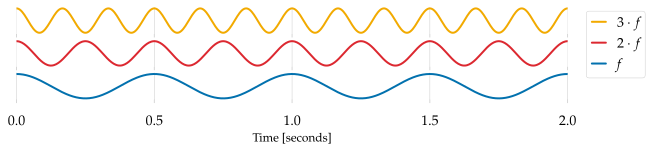

In [24]:
fig, ax = plt.subplots(figsize=figaspect(1/4), nrows=3, sharex=True)

t = np.linspace(0, 2, num=500)
x1 = np.cos(2 * np.pi * 2 * t)
x2 = np.cos(2 * np.pi * 4 * t)
x3 = np.cos(2 * np.pi * 6 * t)
ax[2].plot(t, x1, label='$f$')
ax[1].plot(t, x2, label='$2\\cdot f$', color=colors[1])
ax[0].plot(t, x3, label='$3\\cdot f$', color=colors[2])
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
handles = []
labels = []
for _ax in ax:
    h, l = _ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
    _ax.label_outer()
    _ax.set(yticks=[])
    
fig.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax[2].set(xlabel='Time [seconds]', xticks=[0, 0.5, 1, 1.5, 2])
glue('octave-cycle', fig, display=False)

```{glue:figure} octave-cycle
:alt: Illustration of a sinusoid and two of its harmonics

Waves at frequencies $f=2$ [Hz], $2\cdot f$, and $3\cdot f$.
Note that $2\cdot f$ and $3\cdot f$ complete whole cycles for each cycle of $f$, but not for each-other.
```

The multiplicative nature of frequency means that we need to consider ratios rather than differences when comparing frequencies.
The octave relation $(f, 2\cdot f)$ gives a starting point for generating tuning systems, which map frequencies onto pitches and pitch-classes.

We could spend quite some time on [tuning systems](https://en.wikipedia.org/wiki/Musical_tuning#Tuning_systems), but it's a bit beyond the scope of what we'll need.
For better or worse, we'll focus on 12-tone equal temperament (12-TET), which divides each octave "evenly" into 12 frequencies (*semitones*).
The notion of "evenly" is that the ratio of each successive pair of frequencies remains constant, and after stepping through 12 of them, we have a full octave (ratio of 2).
This implies that each ratio must be $2^{1/12} \approx 1.06$.

While semitone divisions of the octave are useful in many musical contexts, they may be too coarse for other applications where we could benefit from a more fine-grained representation of frequency.
This motivates the use of **cents** (denoted ¢), which divide each semitone range evenly into 100 pieces; or, equivalently, each octave into 1200 pieces.
A change in frequency of 1¢ therefore corresponds to a multiplicative factor of $2^{1/1200} \approx 1.0006$.

### Frequency ranges

Finally, to ground the notion of frequency in reality, the figure below illustrates familiar frequency ranges.

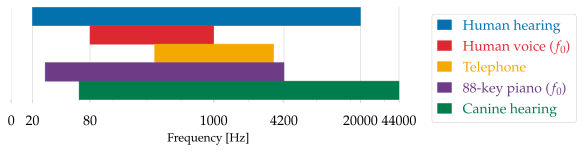

In [25]:
fig, ax = plt.subplots(figsize=figaspect(0.25))

ax.axvspan(20, 20000, ymin=0.8, ymax=1, color=colors[0], label='Human hearing')
ax.axvspan(80, 1000, ymin=0.6, ymax=0.8, color=colors[1], label='Human voice ($f_0$)')
ax.axvspan(300, 3400, ymin=0.4, ymax=0.6, color=colors[2], label='Telephone')
ax.axvspan(32, 4200, ymin=0.2, ymax=0.4, color=colors[4], label='88-key piano ($f_0$)')
ax.axvspan(64, 44000, ymin=0., ymax=0.2, color=colors[5], label='Canine hearing')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labelcolor='linecolor');
ax.set(xlabel='Frequency [Hz]', yticks=[], xlim=[0, 50000], ylim=[1, 0]);
ax.set_xscale('symlog', linthresh=64, base=2)
ax.xaxis.set_major_locator(plt.FixedLocator([0, 20, 80, 1000, 4200, 20000, 44000]))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
glue('freq-range', fig, display=False)

```{glue:figure} freq-range
:alt: Illustration of different frequency ranges for human hearing, voice, telephone, etc.

A visual comparison of important (and not-so-important) frequency ranges.
```